In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Linear Regression with One Variable

### 1.1 Import Dataset

In [174]:
#import dataset
df = pd.read_csv('./machine-learning-ex1/ex1/ex1data1.txt', header=None)

#preview dataset
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [175]:
#describe dataset
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 1. 2 Plot Data

Text(0, 0.5, 'profit in $10,000s')

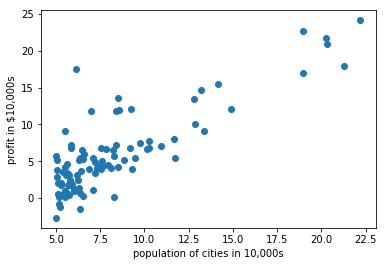

In [176]:
plt.scatter(df[0], df[1])
plt.xlabel('population of cities in 10,000s')
plt.ylabel('profit in $10,000s')

### 1.3 Computing the Cost $J(\theta)$

$$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

In [177]:
x_data = np.array(df[0]).reshape(-1, 1) #x-variable, reshape to form a vector
y_data = np.array(df[1]).reshape(-1, 1) #y-variable, reshape to form a vector
theta = np.zeros((2, 1)) #initialize theta to [0, 0]
m = len(x_data) #length of training set
x_data = np.append(np.ones((m, 1)), x_data, axis=1) #update x_data such that its first column is all ones

In [178]:
def computeCost(X, y, theta):
    """
    input : 1. feature vector, 2.target vector, 3. initial theta values
    output : the cost value
    """
    m = len(X)
    pred = X.dot(theta)
    squared_error = np.sum((pred-y)**2)
    
    return 1/(2*m) * squared_error

In [179]:
computeCost(x_data, y_data, theta)

32.072733877455676

### 1.4 Gradient Descent

$$\large \theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

In [180]:
def gradientDescent(X, y, theta, alpha, num_iter):
    """
    input : 1.feature vector, 2.target vector, 3.alpha-learning rate, 4.number of iterations
    output : theta and record of cost values
    """
    cost_record = []
    
    for i in range(num_iter):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha*gradients
        cost_record.append(computeCost(X, y, theta))
        
    return theta, cost_record

In [181]:
theta, cost_record = gradientDescent(x_data, y_data, theta, 0.01, 1500)

In [182]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [183]:
cost_record[:10]

[6.737190464870006,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.89009494311733,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806386,
 5.86482686531293]

Text(0, 0.5, 'cost$')

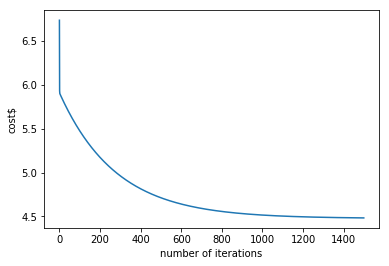

In [184]:
#plot cost values over interations
plt.plot(cost_record)
plt.xlabel('number of iterations')
plt.ylabel('cost$')

### 1.5 Visualizing $J(\theta)$

In [185]:
#create a list of x values
x_values = [x for x in range(25)]

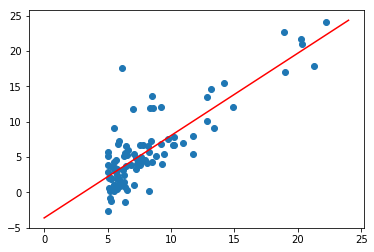

In [186]:
plt.scatter(df[0], df[1])
plt.plot([theta[0][0] + theta[1][0]*value for value in x_values], color='r')

# 2. Multivariate Linear Regression

### 2.1 Import Dataset

In [187]:
#import dataset
df2 = pd.read_csv('./machine-learning-ex1/ex1/ex1data2.txt', header=None)

#preview dataset
df2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.2 Feature Normalization

In [191]:
x = df2.loc[:, 0:1] #feature matrix
y = df2.loc[:, 2] #target vector

In [192]:
#normalization
x = ((x - x.mean()) / x.std()).values
x[:10]

array([[ 0.13000987, -0.22367519],
       [-0.50418984, -0.22367519],
       [ 0.50247636, -0.22367519],
       [-0.73572306, -1.53776691],
       [ 1.25747602,  1.09041654],
       [-0.01973173,  1.09041654],
       [-0.5872398 , -0.22367519],
       [-0.7218814 , -0.22367519],
       [-0.78102304, -0.22367519],
       [-0.63757311, -0.22367519]])

### 2.3 Add Intercept Column

In [193]:
m = len(x)
x = np.hstack((np.ones((m, 1)), x))

In [194]:
x[:10]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654],
       [ 1.        , -0.01973173,  1.09041654],
       [ 1.        , -0.5872398 , -0.22367519],
       [ 1.        , -0.7218814 , -0.22367519],
       [ 1.        , -0.78102304, -0.22367519],
       [ 1.        , -0.63757311, -0.22367519]])

### 2.4 Computing the Cost $J(\theta)$

In [195]:
def computeCostMulti(x, y, theta):
    """
    input : 1.feature matrix, 2.target vector, 3.initial theta
    """
    pred = x.dot(theta)
    squared_error = np.sum((pred-y)**2)
    
    return squared_error / (2*m)

In [196]:
theta = np.zeros((3,1))
y = y[:, np.newaxis]

In [197]:
computeCostMulti(x, y, theta)

65591548106.45744

### 2.5 Gradient Descent - Check Different Learning Rates

* 50 iterations
* Learning rates : (0.3, 0.1, 0.01, 0.03)

In [208]:
theta1, cost_record_1 = gradientDescent(x, y, theta, 0.3, 50)
theta2, cost_record_2 = gradientDescent(x, y, theta, 0.1, 50)
theta3, cost_record_3 = gradientDescent(x, y, theta, 0.01, 400)
theta4, cost_record_4 = gradientDescent(x, y, theta, 0.03, 400)

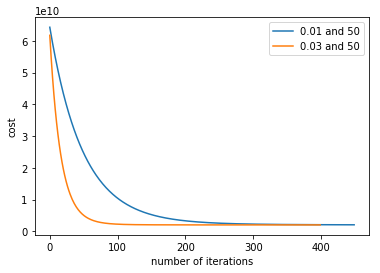

In [206]:
#plot cost values over interations
plt.plot(cost_record_3, label='0.01 and 50')
plt.plot(cost_record_4, label='0.03 and 50')
plt.legend(loc='upper right')
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.show()

# 3. Multivariate Linear Regression Using sklearn

In [209]:
theta3

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

In [201]:
computeCostMulti(x, y, theta3)

2108850058.4007058